In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Predecir individualmente
Mirar como predecirlas en conjuntos

In [2]:
# Lectura de los datos
pm10 = pd.read_csv("data_2017_2022.csv", sep=";")
pm10.head()

,fecha,estacion,variable,tipo,medicion
0,2017-01-01T00:59:59Z,base_aerea,pm25,val,NaN
1,2017-01-01T00:59:59Z,base_aerea,so2,val,NaN
2,2017-01-01T00:59:59Z,base_aerea,lluvia,val,NaN
3,2017-01-01T00:59:59Z,base_aerea,o3,val,NaN
4,2017-01-01T00:59:59Z,base_aerea,temperatura,val,NaN


In [3]:
pm10["fecha"].value_counts().sort_index

<bound method Series.sort_index of 2022-12-31T23:59:59Z    84
2021-09-01T09:59:59Z    84
2021-09-01T03:59:59Z    84
2021-09-01T04:59:59Z    84
2021-09-01T05:59:59Z    84
                        ..
2019-01-01T05:59:59Z    73
2019-01-01T06:59:59Z    73
2019-01-01T07:59:59Z    73
2019-01-01T08:59:59Z    73
2017-01-01T00:59:59Z    73
Name: fecha, Length: 52584, dtype: int64>

In [4]:
pm10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4084061 entries, 0 to 4084060
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   fecha     object
 1   estacion  object
 2   variable  object
 3   tipo      object
 4   medicion  object
dtypes: object(5)
memory usage: 155.8+ MB


In [5]:
# convertir variable medición a númerica
pm10["medicion"]=pm10["medicion"].str.replace(",", ".").astype("float")

In [6]:
# tranformacion de la tabla 
# creacion de columnas para cada variable medida
pm10_pv = pm10.pivot(index=["fecha", "estacion"],columns= "variable", values="medicion").reset_index()
pm10_pv.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento
0,2017-01-01T00:59:59Z,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T00:59:59Z,canaveralejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,NaN,NaN,NaN,0.314265,NaN,NaN,NaN,NaN
2,2017-01-01T00:59:59Z,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,161.0,680.5,0.0,NaN,25.3,NaN,NaN,1.4
3,2017-01-01T00:59:59Z,era_obrero,NaN,NaN,NaN,NaN,0.0,NaN,16.147321,195.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01T00:59:59Z,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,NaN,NaN,2.147475,NaN,NaN,NaN,NaN


In [7]:
# # Datos diarios 
# from datetime import datetime
# compartir["fecha_daily"] = compartir["fecha"].str.slice(start=0,stop=10, step=1)
# compartir["fecha_daily"]= pd.to_datetime(compartir["fecha_daily"])
# compartir.head()

In [8]:
# Datos por hora
pm10_pv["fecha_"]= pm10_pv["fecha"].str.slice(start=0,stop=10, step=1)
pm10_pv["fecha"]= pd.to_datetime(pm10_pv["fecha"])

pm10_pv.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_
0,2017-01-01 00:59:59+00:00,base_aerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01
1,2017-01-01 00:59:59+00:00,canaveralejo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,NaN,NaN,NaN,0.314265,NaN,NaN,NaN,NaN,2017-01-01
2,2017-01-01 00:59:59+00:00,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,161.0,680.5,0.0,NaN,25.3,NaN,NaN,1.4,2017-01-01
3,2017-01-01 00:59:59+00:00,era_obrero,NaN,NaN,NaN,NaN,0.0,NaN,16.147321,195.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01
4,2017-01-01 00:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,NaN,NaN,2.147475,NaN,NaN,NaN,NaN,2017-01-01


## Distribución de los datos de PM10

C:\Users\admin\AppData\Local\Temp\ipykernel_17756\3796599092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(pm10_pv["pm10"], norm_hist=False)


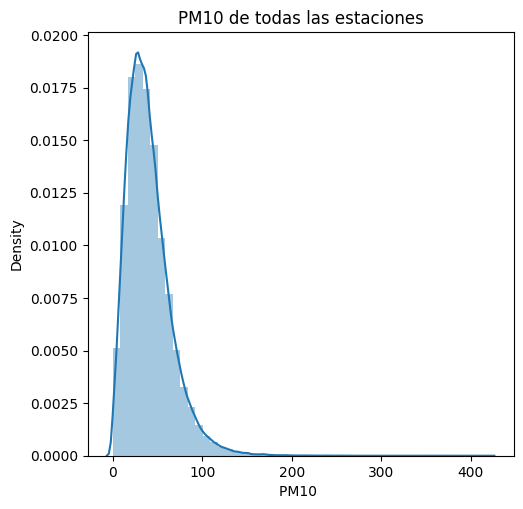

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(pm10_pv["pm10"], norm_hist=False)
g.set_title('PM10 de todas las estaciones');
plt.xlabel("PM10 ");

### Datos faltantes

In [10]:
pm10_pv.isna().sum()

variable
fecha                    0
estacion                 0
black_carbon        464636
direccion_viento    268837
h2s                 457903
humedad             242369
lluvia              212585
no2                 473255
o3                  271320
pm10                238688
pm25                298710
presion             264075
radiacion_solar     251972
so2                 341076
temperatura         206050
temperatura_10_m    459510
uv-pm               464636
velocidad_viento    267851
fecha_                   0
dtype: int64

In [11]:
(pm10_pv.isnull().sum()/len(pm10_pv))*100

variable
fecha                0.000000
estacion             0.000000
black_carbon        98.178576
direccion_viento    56.805830
h2s                 96.755878
humedad             51.213086
lluvia              44.919663
no2                 99.999789
o3                  57.330493
pm10                50.435282
pm25                63.118059
presion             55.799610
radiacion_solar     53.242220
so2                 72.070085
temperatura         43.538804
temperatura_10_m    97.095441
uv-pm               98.178576
velocidad_viento    56.597486
fecha_               0.000000
dtype: float64

In [12]:
compartir = pm10_pv[pm10_pv["estacion"]=="compartir"]
compartir.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_
2,2017-01-01 00:59:59+00:00,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,161.0,680.5,0.0,NaN,25.3,NaN,NaN,1.4,2017-01-01
11,2017-01-01 01:59:59+00:00,compartir,NaN,65.2,NaN,77.3,0.0,NaN,8.240431,229.0,147.0,680.0,0.0,NaN,25.0,NaN,NaN,0.8,2017-01-01
20,2017-01-01 02:59:59+00:00,compartir,NaN,86.8,NaN,77.6,0.0,NaN,6.651205,136.0,78.0,679.5,0.0,NaN,24.6,NaN,NaN,1.4,2017-01-01
29,2017-01-01 03:59:59+00:00,compartir,NaN,216.0,NaN,79.2,0.0,NaN,5.984123,101.0,46.0,679.5,0.0,NaN,24.1,NaN,NaN,1.5,2017-01-01
38,2017-01-01 04:59:59+00:00,compartir,NaN,271.8,NaN,79.9,0.0,NaN,6.513865,90.0,54.0,679.8,0.0,NaN,24.1,NaN,NaN,1.9,2017-01-01


In [13]:
compartir.tail()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_
473213,2022-12-31 19:59:59+00:00,compartir,NaN,81.9,NaN,85.0,0.0,NaN,NaN,NaN,NaN,909.7,17.0,NaN,24.1,21.6,NaN,0.5,2022-12-31
473222,2022-12-31 20:59:59+00:00,compartir,NaN,95.6,NaN,88.9,0.0,NaN,NaN,NaN,NaN,910.8,17.0,NaN,23.6,20.9,NaN,0.6,2022-12-31
473231,2022-12-31 21:59:59+00:00,compartir,NaN,103.3,NaN,89.5,0.0,NaN,NaN,NaN,NaN,911.5,17.0,NaN,23.0,20.3,NaN,0.7,2022-12-31
473240,2022-12-31 22:59:59+00:00,compartir,NaN,78.5,NaN,87.5,0.0,NaN,NaN,NaN,NaN,911.6,17.0,NaN,23.0,20.4,NaN,0.6,2022-12-31
473249,2022-12-31 23:59:59+00:00,compartir,NaN,120.7,NaN,88.7,0.0,NaN,NaN,NaN,NaN,911.5,17.0,NaN,22.9,20.3,NaN,0.4,2022-12-31


In [14]:
test_data = compartir.loc[compartir["fecha_"]=="2022-11-08"]
display(test_data)

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_
461594,2022-11-08 00:59:59+00:00,compartir,NaN,292.1,NaN,88.5,0.4,NaN,NaN,25.0,NaN,910.0,19.0,NaN,24.7,21.9,NaN,0.5,2022-11-08
461603,2022-11-08 01:59:59+00:00,compartir,NaN,343.8,NaN,93.0,0.1,NaN,NaN,21.0,NaN,909.2,19.0,NaN,24.5,21.4,NaN,0.9,2022-11-08
461612,2022-11-08 02:59:59+00:00,compartir,NaN,123.2,NaN,94.1,0.1,NaN,NaN,11.0,NaN,909.6,19.0,NaN,24.1,21.2,NaN,1.2,2022-11-08
461621,2022-11-08 03:59:59+00:00,compartir,NaN,84.2,NaN,94.3,0.1,NaN,NaN,14.0,NaN,910.0,19.0,NaN,23.3,20.4,NaN,0.5,2022-11-08
461630,2022-11-08 04:59:59+00:00,compartir,NaN,76.7,NaN,94.2,0.1,NaN,NaN,12.0,NaN,909.9,19.0,NaN,22.8,19.8,NaN,0.8,2022-11-08
461639,2022-11-08 05:59:59+00:00,compartir,NaN,160.0,NaN,95.9,0.8,NaN,NaN,11.0,NaN,910.3,19.0,NaN,22.7,19.7,NaN,2.3,2022-11-08
461648,2022-11-08 06:59:59+00:00,compartir,NaN,181.7,NaN,92.9,0.0,NaN,NaN,12.0,NaN,910.8,37.0,NaN,22.8,20.1,NaN,1.1,2022-11-08
461657,2022-11-08 07:59:59+00:00,compartir,NaN,20.6,NaN,93.2,0.0,NaN,NaN,28.0,NaN,911.4,105.0,NaN,23.8,20.5,NaN,3.7,2022-11-08
461666,2022-11-08 08:59:59+00:00,compartir,NaN,283.1,NaN,86.7,0.0,NaN,NaN,36.0,NaN,911.7,182.0,NaN,24.8,21.7,NaN,0.3,2022-11-08
461675,2022-11-08 09:59:59+00:00,compartir,NaN,174.4,NaN,76.6,0.0,NaN,NaN,17.0,NaN,911.4,319.0,NaN,27.1,23.5,NaN,1.0,2022-11-08


In [15]:
compartir = compartir.loc[compartir["fecha_"]<"2022-11-08"]
compartir.tail()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento,fecha_
461549,2022-11-07 19:59:59+00:00,compartir,NaN,124.1,NaN,82.3,0.6,NaN,NaN,34.0,NaN,908.6,19.0,NaN,25.8,22.8,NaN,0.9,2022-11-07
461558,2022-11-07 20:59:59+00:00,compartir,NaN,134.2,NaN,84.7,0.3,NaN,NaN,25.0,NaN,909.5,19.0,NaN,25.0,22.3,NaN,1.3,2022-11-07
461567,2022-11-07 21:59:59+00:00,compartir,NaN,147.4,NaN,82.1,0.0,NaN,NaN,28.0,NaN,910.2,19.0,NaN,25.1,22.8,NaN,0.5,2022-11-07
461576,2022-11-07 22:59:59+00:00,compartir,NaN,6.9,NaN,84.5,0.0,NaN,NaN,47.0,NaN,910.5,18.0,NaN,25.5,22.6,NaN,2.0,2022-11-07
461585,2022-11-07 23:59:59+00:00,compartir,NaN,307.9,NaN,88.0,0.0,NaN,NaN,56.0,NaN,910.5,17.0,NaN,25.1,22.1,NaN,0.8,2022-11-07


C:\Users\admin\AppData\Local\Temp\ipykernel_17756\3588157659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(compartir["pm10"], norm_hist=False)


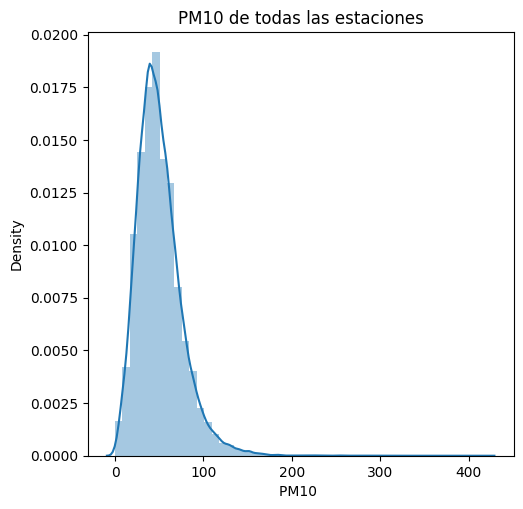

In [16]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(compartir["pm10"], norm_hist=False)
g.set_title('PM10 de todas las estaciones');
plt.xlabel("PM10 ");

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [19]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(compartir['pm10'].tolist(), order=(ari, d, maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

KeyboardInterrupt: 

In [ ]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
dfAIC

,AR(p),d,MA(q),AIC
0,0,1,0,334119.204947
1,0,1,1,332715.003831
2,0,1,2,331256.699836
3,1,1,0,333065.654088
4,1,1,1,327584.676876
5,1,1,2,327584.923975
6,2,1,0,332556.922285
7,2,1,1,327584.702427
8,2,1,2,327588.448774
9,0,2,0,367022.238285


In [ ]:
print('Best ARIMA parameters based on AIC:\n')
dfAIC[dfAIC.AIC == dfAIC.AIC.min()]

Best ARIMA parameters based on AIC:



,AR(p),d,MA(q),AIC
14,1,2,2,8491.224819


In [ ]:
arima_obj = smtsa.ARIMA(compartir['pm10'].tolist(), order=(0, 2, 1))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                51288
Model:                 ARIMA(0, 2, 1)   Log Likelihood             -167061.035
Date:                Thu, 16 May 2024   AIC                         334126.070
Time:                        12:36:33   BIC                         334143.760
Sample:                             0   HQIC                        334131.605
                              - 51288                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9999      0.000  -2884.039      0.000      -1.001      -0.999
sigma2       360.8457      1.104    326.770      0.000     358.681     363.010
===================================================================================
Ljung-Box (L1) (Q):                1344.41   Jarque-Bera (JB):            395398.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.03
Prob(H) (two-sided):                  0.07   Kurtosis:                        16.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

In [ ]:
n_first = pred.shape[0] - compartir.shape[0]
compartir['ARIMA']=pred[n_first:]

In [ ]:
diffval=np.append([0,0], arima_obj_fit.resid)
compartir['diffval']=diffval[n_first:]

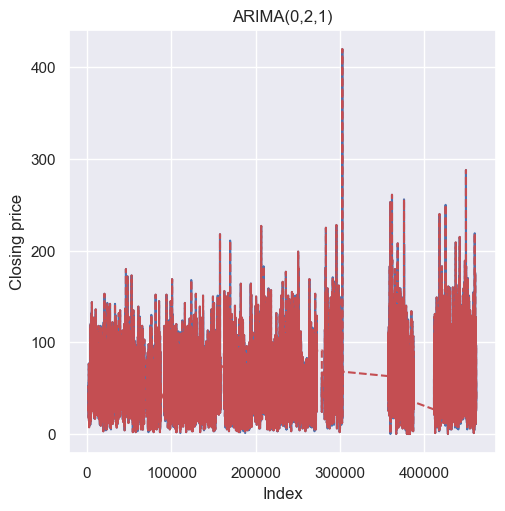

In [ ]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
compartir['pm10'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
compartir['ARIMA'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

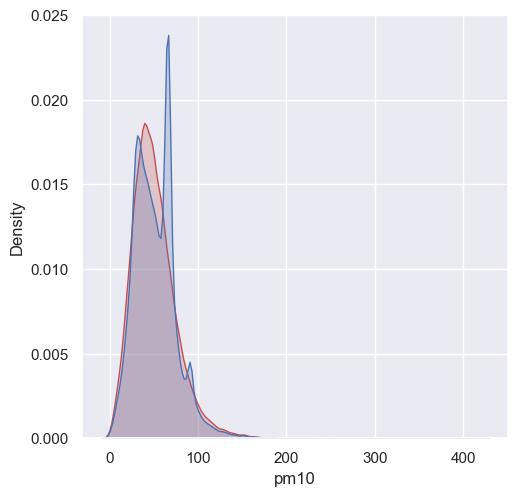

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['ARIMA'], fill=True, color="b")
plt.show()

In [ ]:
# for Kalman Smoothing use R and R objects
import rpy2.robjects as robjects
# import R packages
from rpy2.robjects.packages import importr
imputeTS = importr('imputeTS') 

kalman_StructTs = robjects.r['na.kalman']
kalman_auto_arima = robjects.r['na.kalman']

# for other imputation methods
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def method_plot(df, cols):
    fig, ax = plt.subplots()
    if isinstance(cols, str):
        df[cols].plot(style='b--', ax=ax)
    else:
        for c in cols:
            df[c].plot(style='b--', ax=ax)        
    df['pm10'].plot(style='bo', ax=ax)

<Axes: >

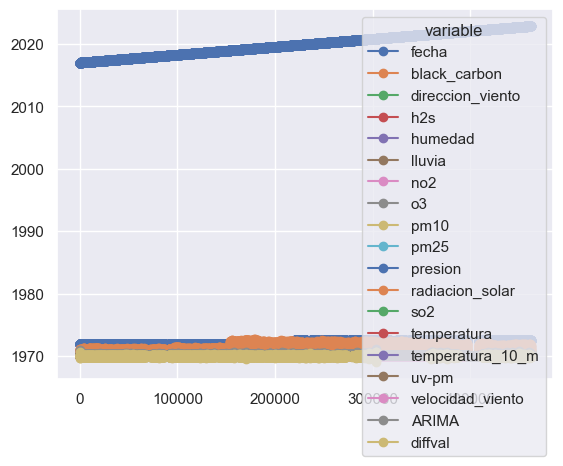

In [ ]:
# pm10_pv.set_index('fecha', inplace=True)
compartir.plot(style='o-')

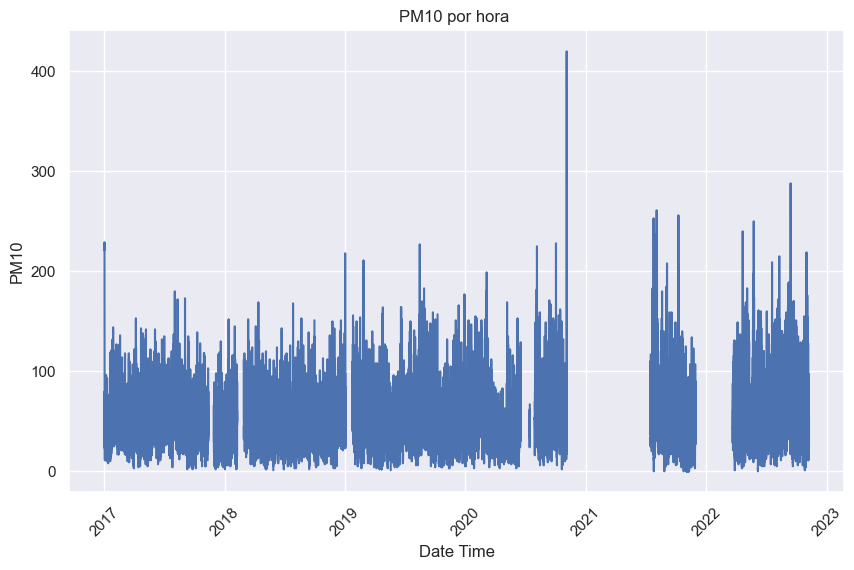

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    compartir['fecha'],
    compartir['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('PM10')
plt.title('PM10 por hora ')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Imputación de datos faltantes

#### Imputación con ultima observación 

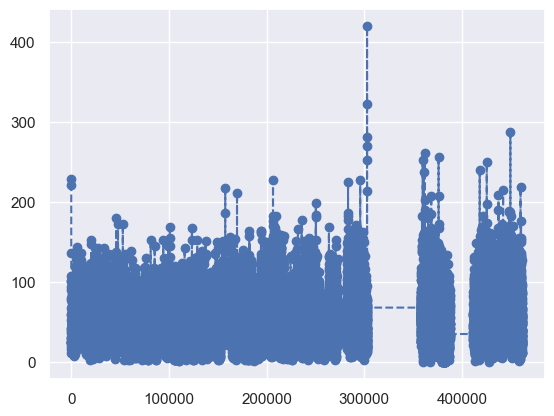

In [ ]:
# pm10_LOCF
compartir['pm10_LOCF'] = compartir['pm10'].fillna(method='ffill')
method_plot(compartir, 'pm10_LOCF')

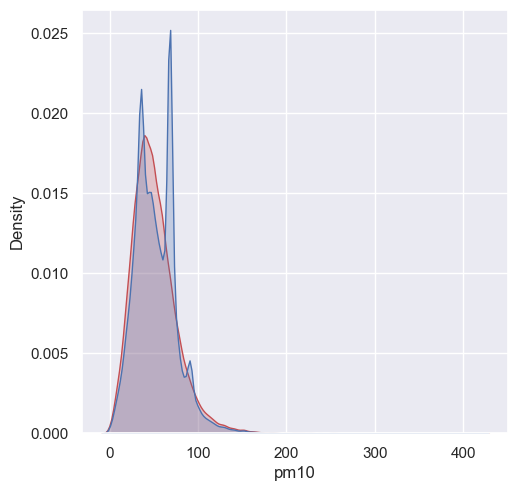

In [ ]:
# plt.figure(figsize=(5.5, 5.5))
# g = sns.distplot(pm10_pv['pm10_LOCF'], norm_hist=False)
# g.set_title('PM10 de todas las estaciones');
# plt.xlabel("PM10 ");

plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['pm10_LOCF'], fill=True, color="b")
plt.show()

#### Imputación interpolación lineal

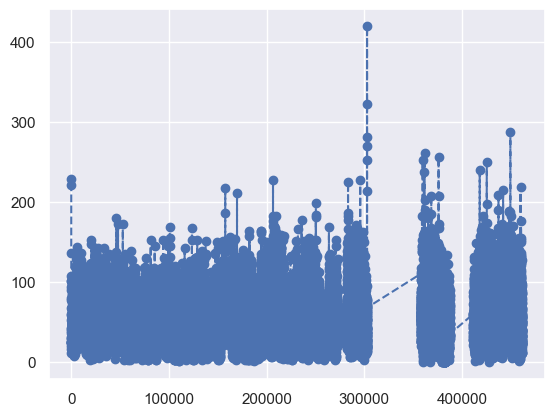

In [ ]:
# Linear Interpolation
compartir['pm10_linear_interpolation'] = compartir['pm10'].interpolate(method='linear')
method_plot(compartir, 'pm10_linear_interpolation')



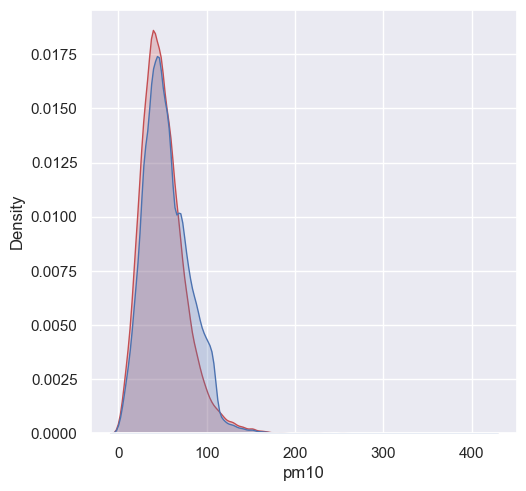

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['pm10_linear_interpolation'], fill=True, color="b")
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(compartir["pm10"].dropna(), compartir["pm10_linear_interpolation"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=873410275.5000, p-value=0.0000


#### Inputación con medias moviles

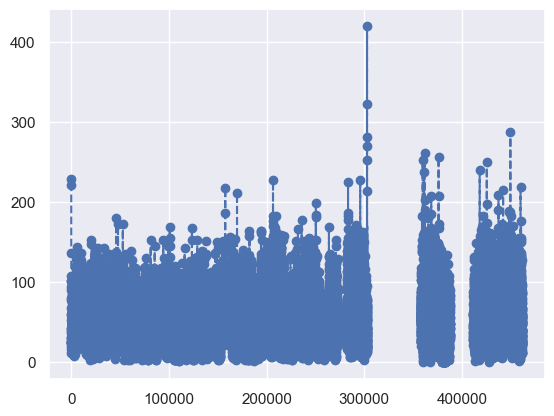

In [ ]:
compartir['pm10_moving_average']=compartir.loc[:, ['pm10']].assign(RollingMean=compartir['pm10'].fillna(compartir['pm10'].rolling(24,min_periods=1,).mean()))['RollingMean']
method_plot(compartir, 'pm10_moving_average')

In [ ]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(compartir["pm10"].dropna(), compartir["pm10_moving_average"].dropna())
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=756446726.0000, p-value=0.7059


#### Imputación con Kalman

In [ ]:
# prepare input values for R 
this_value = np.ndarray.tolist(compartir['pm10'].values)
this_value = robjects.FloatVector(this_value)

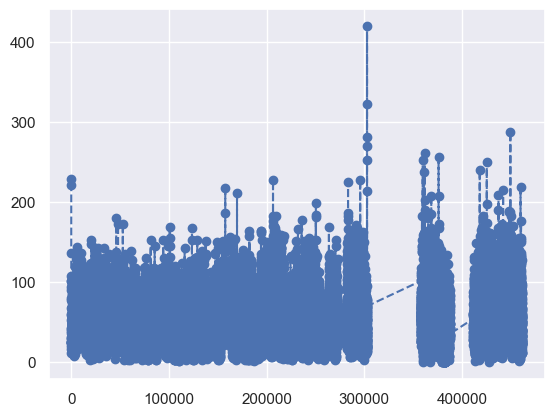

In [ ]:
compartir['pm10_kalman'] = kalman_StructTs(this_value, model = "StructTS")
method_plot(compartir, 'pm10_kalman')

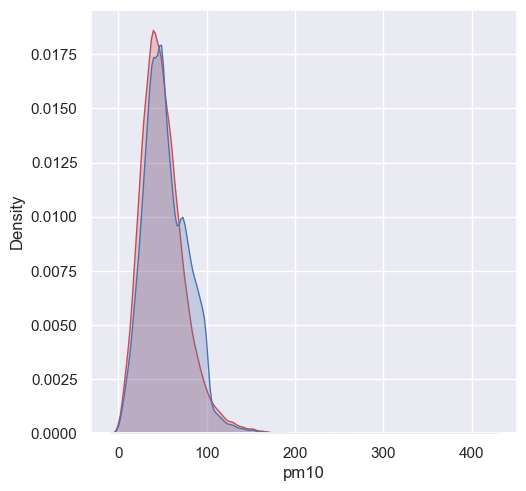

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['pm10_kalman'], fill=True, color="b")
plt.show()

In [ ]:
compartir["pm10"].dropna()

2         221.0
11        229.0
20        136.0
29        101.0
38         90.0
          ...  
461549     34.0
461558     25.0
461567     28.0
461576     47.0
461585     56.0
Name: pm10, Length: 38240, dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(compartir["pm10"].dropna(), compartir["pm10_kalman"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=879293015.0000, p-value=0.0000


#### Imputación con Kalman-ARIMA

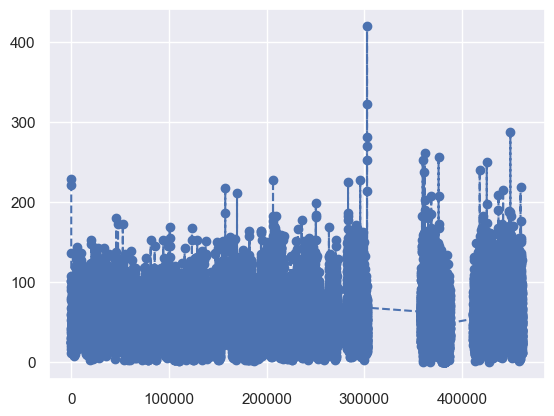

In [ ]:
compartir['pm10_arima']  = kalman_StructTs(this_value, model = "auto.arima")
method_plot(compartir, 'pm10_arima')

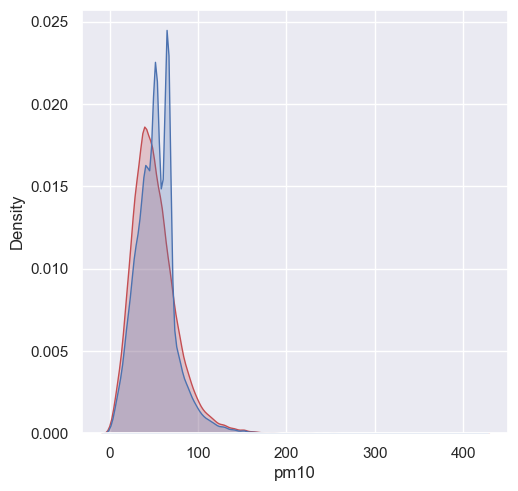

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['pm10_arima'], fill=True, color="b")
plt.show()

#### Distribución acumulada

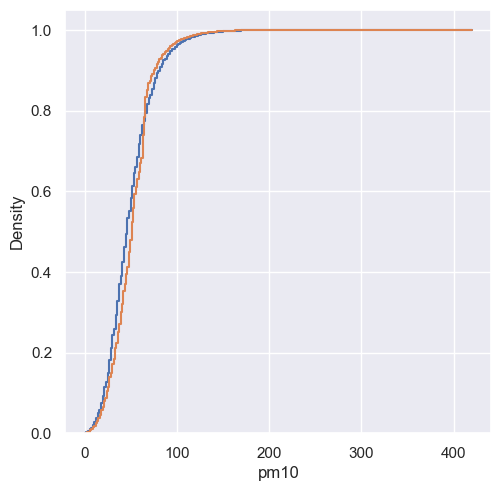

In [211]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.histplot(compartir['pm10'], stat="density", element="step", fill=False, cumulative=True, common_norm=False)
sns.histplot(compartir['pm10_arima'], stat="density", element="step", fill=False, cumulative=True, common_norm=False)
plt.show()

In [212]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(compartir["pm10"].dropna(), compartir["pm10_arima"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=899669219.0000, p-value=0.0000


### Imputación iterativa multiple

In [213]:
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [214]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

In [215]:
data = compartir.loc[:,["pm10", "temperatura", "velocidad_viento", "presion"]].values
print('Missing: %d' % sum(isnan(data).flatten()))

Missing: 22154


In [216]:
imputer = IterativeImputer()
imputer.fit(data)
Xtrans = imputer.transform(data)

print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 0


In [242]:
df_sinNA=pd.DataFrame(Xtrans, columns=["pm10", "temperatura", "velocidad_viento", "presion"])
df_sinNA=pd.concat([df_sinNA, compartir['fecha'].reset_index()], axis=1)
df_sinNA.head()

,pm10,temperatura,velocidad_viento,presion,index,fecha
0,221.0,25.3,1.4,680.5,2,2017-01-01 00:59:59+00:00
1,229.0,25.0,0.8,680.0,11,2017-01-01 01:59:59+00:00
2,136.0,24.6,1.4,679.5,20,2017-01-01 02:59:59+00:00
3,101.0,24.1,1.5,679.5,29,2017-01-01 03:59:59+00:00
4,90.0,24.1,1.9,679.8,38,2017-01-01 04:59:59+00:00


In [234]:
compartir.head()

variable,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,...,velocidad_viento,fecha_,ARIMA,diffval,pm10_LOCF,pm10_linear_interpolation,pm10_moving_average,pm10_kalman,pm10_arima,pm10_iterative
2,2017-01-01 00:59:59+00:00,compartir,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,...,1.4,2017-01-01,0.000000,221.000000,221.0,221.0,221.0,221.0,221.0,136.0
11,2017-01-01 01:59:59+00:00,compartir,NaN,65.2,NaN,77.3,0.0,NaN,8.240431,229.0,...,0.8,2017-01-01,331.500000,-102.500000,229.0,229.0,229.0,229.0,229.0,60.0
20,2017-01-01 02:59:59+00:00,compartir,NaN,86.8,NaN,77.6,0.0,NaN,6.651205,136.0,...,1.4,2017-01-01,237.073888,-101.073888,136.0,136.0,136.0,136.0,136.0,25.0
29,2017-01-01 03:59:59+00:00,compartir,NaN,216.0,NaN,79.2,0.0,NaN,5.984123,101.0,...,1.5,2017-01-01,93.555165,7.444835,101.0,101.0,101.0,101.0,101.0,25.0
38,2017-01-01 04:59:59+00:00,compartir,NaN,271.8,NaN,79.9,0.0,NaN,6.513865,90.0,...,1.9,2017-01-01,61.036180,28.963820,90.0,90.0,90.0,90.0,90.0,33.0


In [230]:
df_sinNA.shape

(51288, 5)

In [229]:
compartir.shape

(51288, 27)

<Axes: >

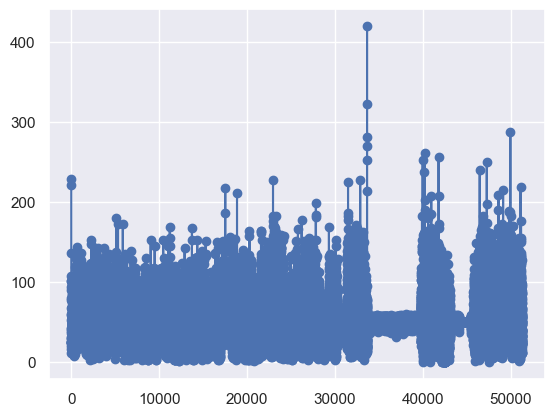

In [243]:
df_sinNA.pm10.plot(style='o-')

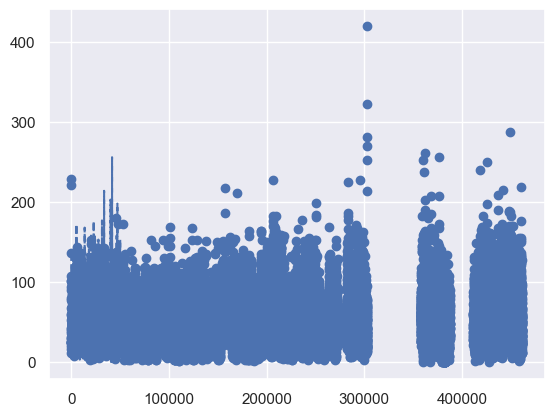

In [219]:
compartir['pm10_iterative']  = df_sinNA["pm10"]
method_plot(compartir, 'pm10_iterative')

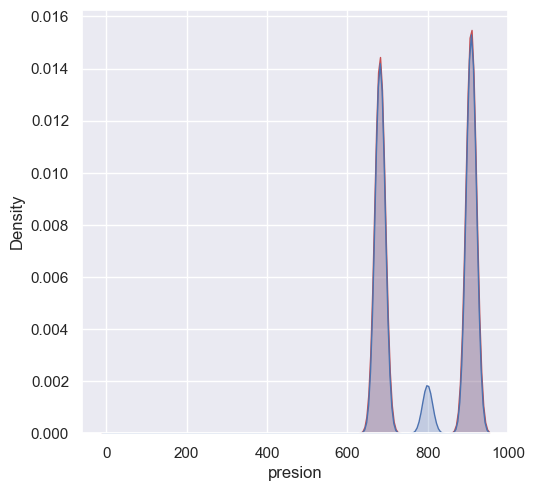

In [220]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['presion'], fill=True, color="r")
sns.kdeplot(df_sinNA['presion'], fill=True, color="b")
plt.show()

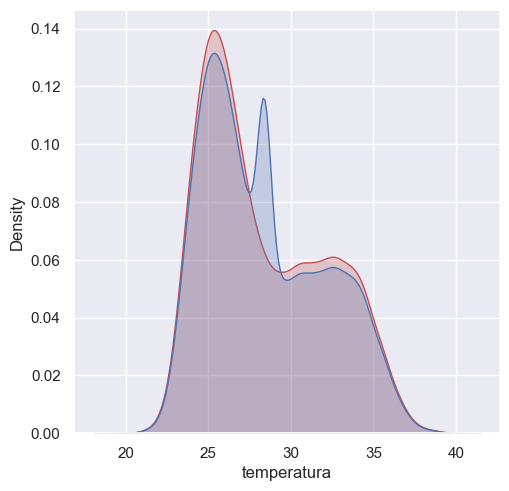

In [221]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['temperatura'], fill=True, color="r")
sns.kdeplot(df_sinNA['temperatura'], fill=True, color="b")
plt.show()

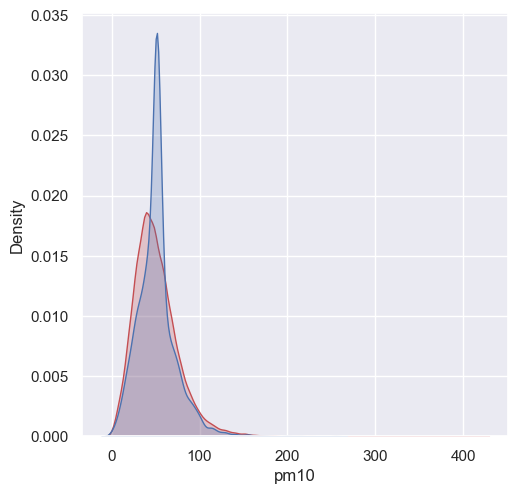

In [222]:
plt.figure(figsize=(5.5, 5.5))
sns.set_theme(style="darkgrid")
sns.kdeplot(compartir['pm10'], fill=True, color="r")
sns.kdeplot(compartir['pm10_iterative'], fill=True, color="b")
plt.show()

In [244]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(compartir["pm10"].dropna(), df_sinNA["pm10"])
print(f" Mann.Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann.Whitney U Test: statistic=942481942.0000, p-value=0.0000


In [246]:
df_sinNA=df_sinNA.set_index('fecha', drop=False)

# Analisis exploratorio

In [247]:
daily = df_sinNA['pm10'].resample('D')
daily_mean = daily.mean()

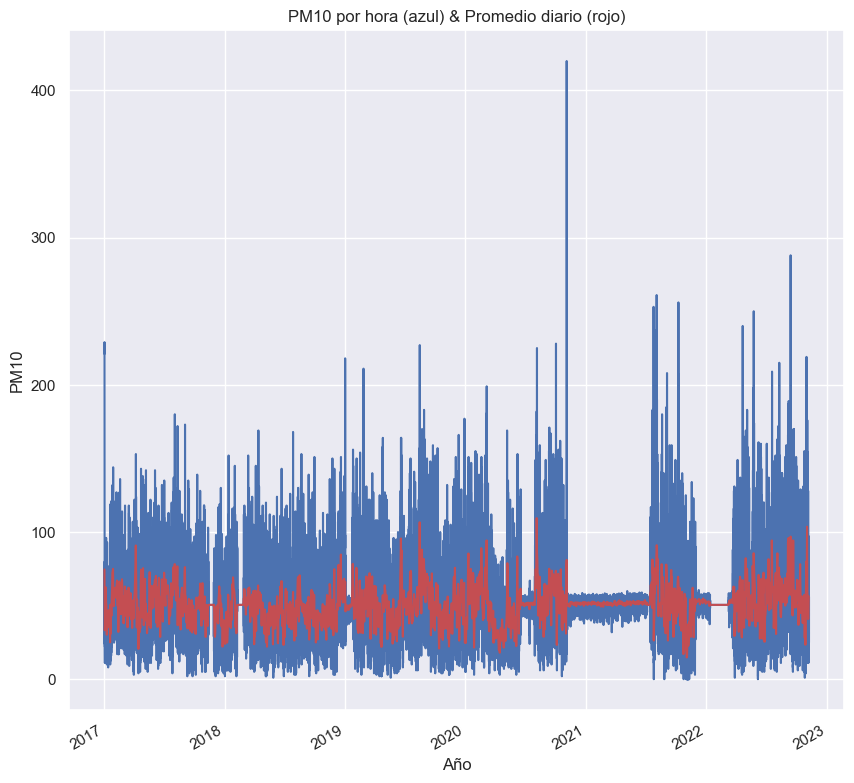

In [252]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
df_sinNA['pm10'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('PM10 por hora (azul) & Promedio diario (rojo)');
ax.set_xlabel('Año');
ax.set_ylabel('PM10');

### Procesos estacionarios

In [254]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import warnings
warnings.filterwarnings("ignore")

def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    
    return None

ADF Statistic: -19.399941
p-value: 0.000000


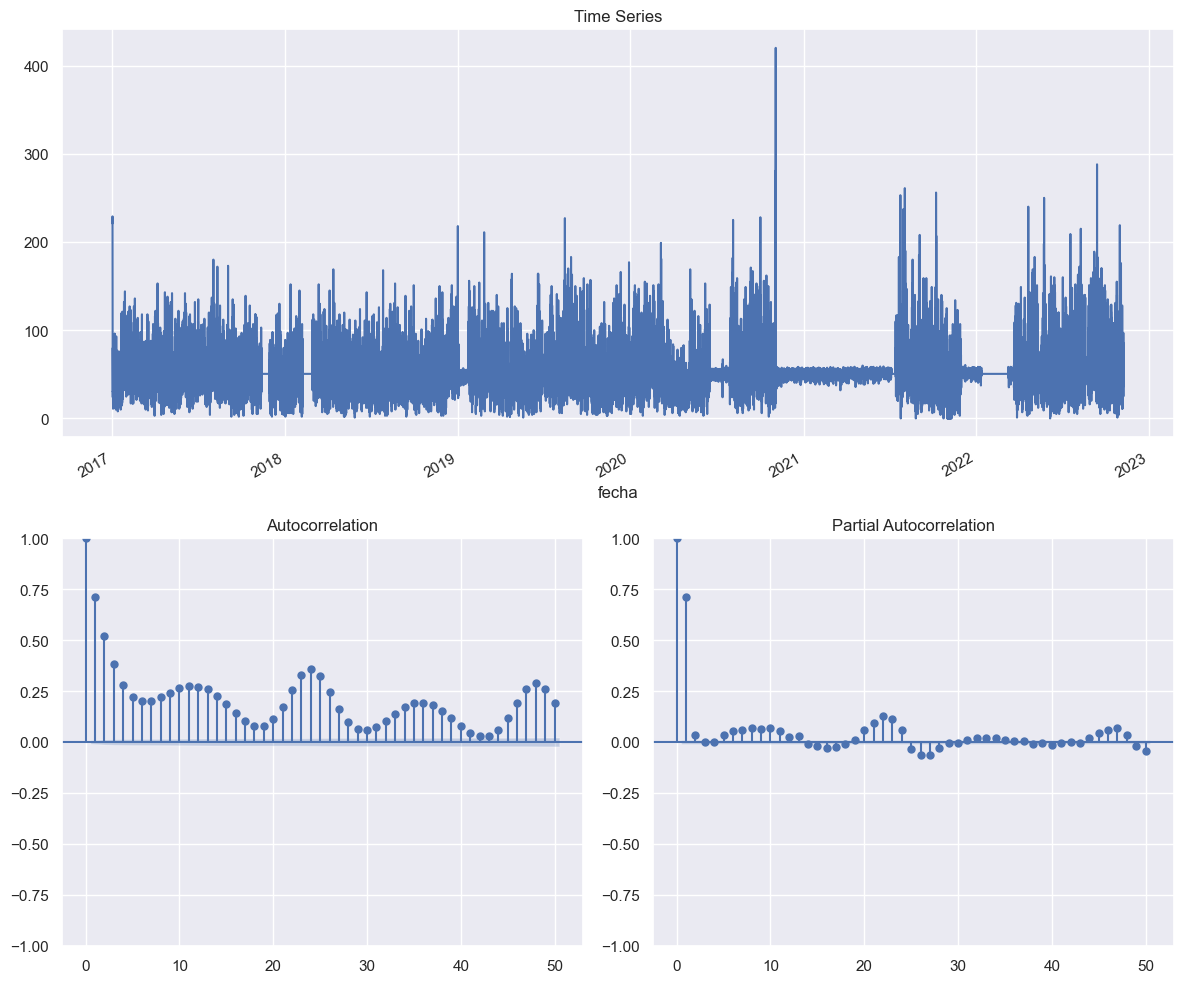

In [255]:
from statsmodels.tsa.stattools import adfuller
plotds(df_sinNA.pm10)
adf_result= adfuller(df_sinNA.pm10.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [285]:
first_order_diff = df_sinNA['pm10'].diff(1)

In [299]:
second_order_diff = df_sinNA['pm10'].diff(1).diff()

In [260]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

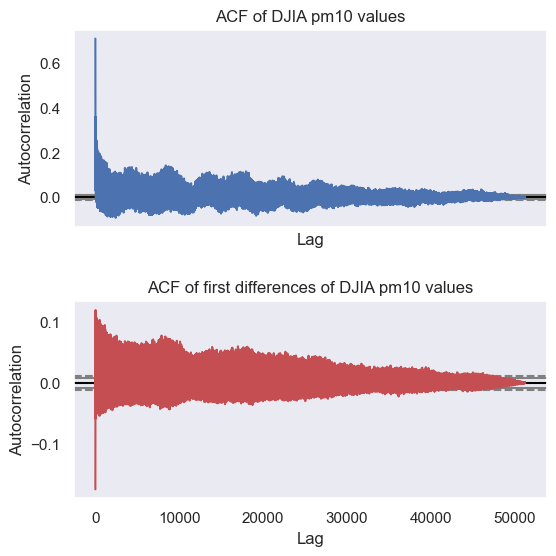

In [301]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(df_sinNA['pm10'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA pm10 values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA pm10 values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [261]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(df_sinNA['pm10'],
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [262]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

In [263]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [264]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 0.0
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17 for p-val = 0.0
Nu

In [296]:
acf_second_diff, confint_second_diff,\
qstat_second_diff, pvalues_second_diff = stattools.acf(second_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [297]:
alpha = 0.05
for l, p_val in enumerate(pvalues_second_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = nan
Null hypothesis is rejected at lag = 1 for p-val = nan
Null hypothesis is rejected at lag = 2 for p-val = nan
Null hypothesis is rejected at lag = 3 for p-val = nan
Null hypothesis is rejected at lag = 4 for p-val = nan
Null hypothesis is rejected at lag = 5 for p-val = nan
Null hypothesis is rejected at lag = 6 for p-val = nan
Null hypothesis is rejected at lag = 7 for p-val = nan
Null hypothesis is rejected at lag = 8 for p-val = nan
Null hypothesis is rejected at lag = 9 for p-val = nan
Null hypothesis is rejected at lag = 10 for p-val = nan
Null hypothesis is rejected at lag = 11 for p-val = nan
Null hypothesis is rejected at lag = 12 for p-val = nan
Null hypothesis is rejected at lag = 13 for p-val = nan
Null hypothesis is rejected at lag = 14 for p-val = nan
Null hypothesis is rejected at lag = 15 for p-val = nan
Null hypothesis is rejected at lag = 16 for p-val = nan
Null hypothesis is rejected at lag = 17 for p-val = nan
Nu